In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from itertools import chain
%matplotlib inline

In [3]:
dt = '190117'
data_dir = '../prd_review_v2/data/'

In [3]:
df = pd.read_pickle(data_dir + 'df_raw_'+dt+'.pkl')
len(df)

1050827

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050827 entries, 0 to 1050826
Data columns (total 16 columns):
best_flag            30975 non-null object
credate              1050827 non-null int64
cus_grade            1050827 non-null object
lsectid              1039773 non-null float64
m_id                 1050827 non-null object
msectid              1039773 non-null float64
opposition_count     1050827 non-null int64
participant_count    1050827 non-null int64
prdid                1050827 non-null int64
prdname              1050827 non-null object
read_count           1050827 non-null int64
reply_adopt          0 non-null object
reply_count          1050827 non-null int64
score                1050827 non-null int64
text                 1050827 non-null object
term_vectors         1050827 non-null object
dtypes: float64(2), int64(7), object(7)
memory usage: 128.3+ MB


In [5]:
df['len_terms'] = df.term_vectors.apply(lambda term_vector: len(term_vector))

In [6]:
df.head()

,best_flag,credate,cus_grade,lsectid,m_id,msectid,opposition_count,participant_count,prdid,prdname,read_count,reply_adopt,reply_count,score,text,term_vectors,len_terms
0,None,1543696532000,SS,566337.0,134834200,975907.0,0,0,33918016,[랑콤][홀리데이]립 미니어쳐 세트,0,None,0,100,반은 맘에 들고 나머지는 별루,"[반, 맘, 들, 나머지, 별루]",5
1,None,1544203627000,SS,1378779.0,135004415,1378960.0,0,0,31902552,[티각태각] 속초 중앙시장 부각 맛집 부각세트 30봉(6종),0,None,0,100,상품평가,[상품평],1
2,None,1543403035000,GG,1425860.0,134719974,1425910.0,0,0,31629868,순수 더 살롱 컬러 염색약 세트(염색제7+염색보+헤어앰플),0,None,0,100,상품잘받았습니다,"[상품, 잘, 받]",3
3,None,1543380565000,CC,1378765.0,134714303,1379099.0,0,0,29543066,라코스테 카나비 BL 1 SPW 732SPW0132-001 (4079335),0,None,0,85,매장서 이 맞길래 싸이즈 주문했더니 뒤꿈치 손가락 하나가 쑥 들어가네요 반품해야 될...,"[매장, 230, 맞, 싸, 이즈, 230, 주문, 뒤꿈치, 꿈치, 손가락, 하나,...",16
4,None,1543403061000,SS,1378781.0,134719990,1379357.0,0,0,33464893,[저스트원] 올리 wool 가네꼬조끼,0,None,0,90,까실까실한 소재 제품 혼용율에 울이 라고해서 구매했는데 택이 전혀없어서 뭘보고 믿어...,"[까실까실, 한, 소재, 제품, 혼용, 율, 울, 55, 해서, 구매, 택, 전혀,...",70


In [8]:
# # best prd_review
# df_best = df.dropna(subset=['best_flag'])

In [9]:
# sns.barplot(x=df_best.groupby(by=['len_terms']).size().index, y=df_best.groupby(by=['len_terms']).size())

In [7]:
a4_dims = (11.7, 8.27)


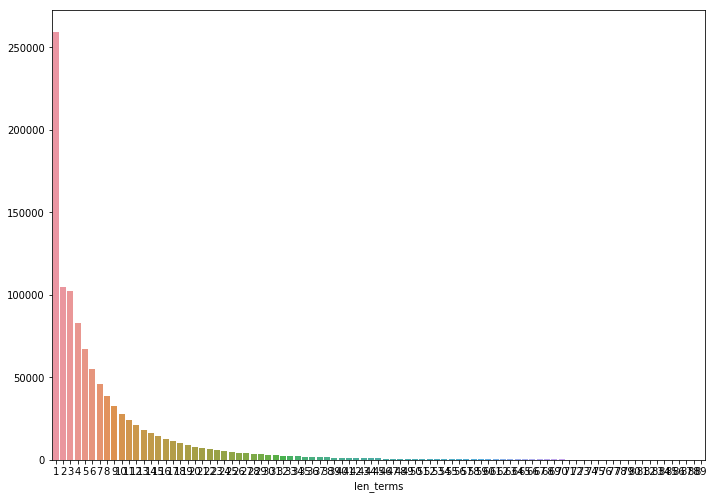

In [13]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=df.groupby(by=['len_terms']).size().index, y=df.groupby(by=['len_terms']).size())

In [14]:
df.len_terms.describe()

count    1.050827e+06
mean     7.715735e+00
std      9.913038e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      8.900000e+01
Name: len_terms, dtype: float64

In [9]:
df.len_terms.describe()

count    775741.000000
mean          8.354635
std          10.330506
min           1.000000
25%           2.000000
50%           4.000000
75%          10.000000
max          94.000000
Name: len_terms, dtype: float64

In [32]:
# 1 : len_terms 5 이상 / score 100
df_positive = df.loc[(df.len_terms>5)&(df.score > 99)]
len(df_positive)

334314

In [33]:
df_positive.sample(20)

,best_flag,credate,cus_grade,lsectid,m_id,msectid,opposition_count,participant_count,prdid,prdname,read_count,reply_adopt,reply_count,score,text,term_vectors,len_terms
799543,None,1543624030000,SS,1378813.0,134809420,1379292.0,0,0,32992798,[얼리버드 무배특가] 여성패션양말 밴드페인팅 양말(6족세트),0,None,0,100,겨울에검정색양말이필요해서주문했는데겨울용은아니네요지금신기딱이에요적립금사용해서저렴하게잘...,"[겨울, 검정, 색, 양말, 필요, 주문, 겨울용, 지금, 신기, 딱, 적립금, 사...",17
93337,None,1544118433000,SS,1378791.0,134974171,1379059.0,0,0,16880977,[아이리스코리아] 개별 비닐포장 40매입 일회용 마스크,0,None,0,100,딸이 매일 써요 개별포장이라 더 좋내요,"[딸, 매일, 쓰, 개별, 포장, 더, 좋, 내요]",8
122247,None,1543956153000,CC,1378791.0,134911526,1379059.0,0,0,29608724,애니가드 미세먼지 황사방역마스크(KF94)-소형20매/어린이마스크,0,None,0,100,빠른 배송 받았고 이 제품 전에도 사용했는데 너무 좋습니다,"[빠른, 배송, 받, 이, 제품, 전, 사용, 너무, 좋]",9
637797,None,1547512919000,SS,421220.0,135969854,1087054.0,0,0,27597451,리더낚시 AOMEX 카본낚시대 낚시용품 퍼펙트 16종 풀세트,0,None,0,100,이거 바다 낚시 못하는거래요 돈만 날림,"[이거, 바다, 낚시, 못, 하, 돈, 날림]",7
1041578,None,1547500553000,SS,421220.0,135965471,1087058.0,0,3,33821241,황사마스크 연예인 검정마스크 미세먼지 KF94 60매 메디쉴드,0,None,0,100,검정색이라 겨울에 하기 좋아요 다른마스크보다 냄새 많이 덜나서 좋아요,"[검정, 색, 겨울, 하, 좋, 다른, 마스크, 냄새, 많이, 덜, 나, 좋]",12
350710,None,1542880353000,SS,1378762.0,134575902,1378912.0,0,0,24013893,"미스터보울러 슬링백 Black Silk B1,B2",0,None,0,100,조금 작지만 유럽여행이 코앞이라 구매확정이요,"[조금, 작, 유럽, 여행, 코앞, 앞, 구매, 확정]",8
852803,None,1543216245000,SS,1378780.0,134661137,1378962.0,0,0,33102261,테팔 럭키박스 (500세트한정),0,None,0,100,생각보다 후라이팬의 모양이 가볍네요 좀 묵직하면 좋으련만 이 가격이면 그냥이라도 살...,"[생각, 후라이팬, 모양, 가볍, 좀, 묵직, 좋, 이, 가격, 그냥, 살, 있, 같]",13
1047941,None,1547592315000,SS,1425746.0,135995663,1425748.0,0,0,17790876,미샤 타임 레볼루션 이모탈 유스 블루 에센스,0,None,0,100,건조한 피부에 오일과 함께 사용하면 넘 좋아요 피부가 촉촉해지네요,"[건조, 피부, 오일, 함께, 사용, 넘, 좋, 피부, 촉촉, 지]",10
135527,None,1544299391000,DD,566337.0,135039360,1336555.0,0,0,24631917,싸이닉 [대용량증정] 퍼스트 에센스 150ml+215ml,0,None,0,100,좋습니다 상품이야 가성비갑이라좋구요 배송이 빨라서 너무 좋아요,"[좋, 상품, 가성비, 갑, 좋, 배송, 빨라서, 너무, 좋]",9
819525,None,1543437095000,CC,421220.0,134736393,1087057.0,0,1,33681344,소이현의 제뉴 폭스퍼 롱구스 다운 패딩,0,None,0,100,기대했던 것보다 원단도 좋고 핏이 넘 예뻐요 근데 좀 무거워요,"[기대, 원단, 좋, 핏, 넘, 예쁘, 근데, 좀, 무겁]",9


In [34]:
df_positive['y'] = 1
df_positive = df_positive[['m_id', 'text', 'term_vectors', 'y']]



/home/admin-/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_positive.sample(20)

,m_id,text,term_vectors,y
696294,136000546,백팩 디자인예쁘고 크기도 적당함 잘사용하겠습니다,"[백팩, 디자인, 예쁘, 크기, 적당, 잘, 사용]",1
118022,134764002,이미지와는 다르게 흰점들이 아주 많이 있습니다 상품문의 답변처럼 아무 이상없기를 바...,"[이미지, 다르, 흰, 점, 들, 아주, 많이, 있, 상품, 문, 답변, 암, 이상...",1
477344,134871667,완전 대박 👍👍👍 친구가 사용해보고 단톡방에 진짜 후회하지 않을거라고 꼭 구매해보라...,"[완전, 대박, 👍👍👍, 친구, 사용, 보, 단, 톡, 방, 진짜, 후회, 않, 꼭...",1
192444,135286117,겨울에 따틋할듯 한데 신랑 스퇄은 아니라네요 그냥 입는다고 하네요,"[겨울, 따, 한데, 신랑, 스, 그냥, 입, 하]",1
106697,135093361,살 겹치는곳에 발라주는데 좋습니다,"[살, 겹치, 곳, 발라, 주, 좋]",1
724009,134950059,생각보다 빠른 배송에 기분좋게 상품을 개봉했네요 이번이 번째 재구매 팩트답게 피부에...,"[생각, 빠른, 배송, 기분, 좋, 상품, 개봉, 이번, 번, 3, 번, 째, 재구...",1
95306,135030144,각 티슈보다 훨 사용하기 편리해서 늘 애정하는,"[각, 티슈, 훨, 사용, 편리, 늘, 애정]",1
739493,134622530,가볍고 따뜻하고 만족합니다 빠른 교환도 감사합니다,"[가볍, 따뜻, 만족, 빠른, 교환, 감사]",1
680547,135538567,저렴한 가격 막써도되는 마스크,"[저렴, 가격, 막, 쓰, 되, 마스크]",1
878105,134805268,애기 볼플장 하려고 구입했어요ㅎ 여름에는 수영장 해줘야지요ㅋ,"[애기, 볼, 플, 장, 하, 구입, ㅎ, 여름, 수영장, 장, 해, 줘야, 하, ㅋ]",1


In [36]:
# 0 : len_terms 5 이상 / score <= 75
df_negative = df.loc[(df.len_terms>5)  & (df.score <= 75)]
len(df_negative)

32357

In [37]:
df_negative['y'] = 0
df_negative = df_negative[['m_id', 'text', 'term_vectors', 'y']]


/home/admin-/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_negative.sample(20)

,m_id,text,term_vectors,y
768233,134687801,한겨울용은아닌듯 좀 얇고 바지통은 방송처럼 슬림핏은 아님 기장은 짧고 좀 크게 나온...,"[한, 겨울용, 좀, 얇, 바지통, 통, 방송, 슬림, 핏, 기장, 짧, 좀, 크,...",0
652568,135392190,별로에여 저는 ㅠ 밑위도 짧고 걷다보면 흘러내려서 잘 안 입게 되네여,"[별로, 제, 밑위, 위, 짧, 걷, 보, 흘러, 내리, 잘, 안, 입, 되]",0
984179,135525015,아주 만족스런 상품은 아니고 가격대비 쓸만합니다,"[아주, 만족, 상품, 가격, 대비, 쓸]",0
789122,134788508,플리스 상태가 좀 별루지만 저렴하게 입기좋구요 한치수 크게 샀더니 여유있네요,"[플리스, 상태, 좀, 별루, 저렴, 입, 좋, 한, 치수, 크, 샀, 여유, 있]",0
167212,135156550,정전기 망사와 아남이 뒤틀려서 과연 몇번이나 입게될지ㅠ,"[정전기, 전기, 망사, 아, 남, 뒤틀리, 과연, 몇, 번, 입, 될지]",0
735667,134954341,사진하고 같은 느낌 단추가 하나 바로 떨어짐 바느질이 부실해서 실망,"[사진, 같, 느낌, 단추, 하나, 바로, 떨어짐, 바느질, 이, 부실, 실망]",0
851081,134790530,코털제모기 기능을 못해서 다른상품 구매했어요 제대로 성능확인후 판매바랍니다,"[코털, 털, 제모, 기, 기능, 못, 해서, 다른, 상품, 구매, 제대로, 성능,...",0
733750,134951560,흠 어딜봐도 소보제화인지 알수가 없어요 포장박스에도 신발바닥에도 지퍼옆에도 ㅋ 블로...,"[흠, 어딜, 봐도, 소보, 제화, 알, 없, 포장, 박스, 발바닥, 지퍼, 옆, ...",0
459378,134891748,상품평에 좀 작다는 평이 있어서 한싸이즈 크게 샀더니 저는 좀 크네요 정싸이즈가 좋...,"[상품평, 좀, 작, 평, 있, 한, 싸이, 즈, 크, 샀, 제, 좀, 크, 정, ...",0
61490,135072252,삼겹살은 그런대로 먹을만 합니다만 생선은 구이가 아닌 찜 수준이라 겉과 속 모두 촉...,"[삼겹살, 살, 그런대로, 먹, 합니다만, 생선, 구이, 찜, 수준, 겉, 속, 모...",0


In [39]:
df_dataset = df_positive.append(df_negative)

In [40]:
len(df_dataset)

366671

In [41]:
df_dataset = df_dataset.rename({'term_vectors': 'x'}, axis=1)

In [42]:
df_dataset.head()

,m_id,text,x,y
6,134721450,넘 좋아여 빗어도빗어도 계속해서 나오네여 근데 좀 무겁네여 빗날이 넘 세서 그런지 ...,"[넘, 좋, 아여, 빗, 빗, 계속, 나오, 근데, 좀, 무겁, 빗, 날, 넘, 세...",1
9,134721451,생각보다 무게감이 더 있어요 가격대비 아주 잘 쓰고 있습니다,"[생각, 무게감, 더, 있, 가격, 대비, 아주, 잘, 쓸, 있]",1
12,134720028,배송 받자마자 입엇어요 넘 이쁘고 정말 쫀득하니 몸에 착달라붙어 좋앗어요,"[배송, 받, 입, 넘, 이쁘, 정말, 쫀득, 몸, 착, 달라붙, 좋]",1
13,134721485,위치 좋고 깨끗하고 좋은 시간 보내고 왔어요,"[위치, 좋, 깨끗, 좋, 시간, 보내, 왔]",1
15,134720034,좋은가격에 잘 산거 같아요 은은한 향에 거품도 잘나는 편이고 세정력도 좋네요,"[좋, 가격, 잘, 살, 같, 은은, 향, 거품, 잘나, 세정력, 력, 좋]",1


In [44]:
df_dataset.sample(frac=1).reset_index(drop=True).to_pickle(data_dir+'df_dataset_'+dt+'.pkl')

In [4]:
df_dataset = pd.read_pickle(data_dir+'df_dataset_'+dt+'.pkl')

In [5]:
text = df_dataset.x.tolist()
word_count = dict()

for word in chain(*text):
    if not word in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1

In [7]:
df_word_count = pd.DataFrame(data={'word':list(word_count.keys()), 'cnt':list(word_count.values())})
df_word_count = df_word_count.sort_values(by=['cnt'], ascending=False).reset_index(drop=True)

In [9]:
df_word_count.head()

,word,cnt
0,좋,225102
1,잘,98291
2,있,89924
3,하,63707
4,입,63618


In [10]:
df_word_count.cnt.describe()

count     37937.000000
mean        143.825764
std        1912.243042
min           1.000000
25%           1.000000
50%           3.000000
75%          13.000000
max      225102.000000
Name: cnt, dtype: float64

In [32]:
min_cnt = df_word_count.cnt.quantile(0.7)
min_cnt

9.0

In [34]:
len(df_word_count.loc[df_word_count.cnt >= min_cnt])

11678

In [35]:
df_word_count.loc[(df_word_count.cnt >= min_cnt) & (df_word_count.cnt < min_cnt + 3)]

,word,cnt
10155,서류,11
10156,통세,11
10157,불순물,11
10158,답글,11
10159,이존,11
10160,187,11
10161,받아들이,11
10162,단일,11
10163,동그라미,11
10164,아합,11
